# Семантическое понимание сцены

Задача проекта - проанализировав изображение распознать объекты и их месторасположение на рисунке. Выделение объектов осуществляется с помощью фильтра цветовой гаммы `inRange`. В задаче 1 требуется найти выход из лабиринта распознав стены на изображени, в задаче 2 - идентифицировать дороги и наличие пробок на каждой из них.

In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.
    
    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))
    
    axs.imshow(image)
    axs.axis('off')
    plt.plot()

# Задача №1 - Лабиринт

Реализуем алгоритм поиска выхода из лабиринта по растровому изобажению.
Алгоритм будет находить путь (координаты пикселей) от заданного входа сверху до выхода снизу.

После чего отрисуем получившийся маршрут на карте с помощью функции ```plot_maze_path(img, coords)```.

__Input:__

Изображение лабиринта в кодировке $RGB$.

Все карты лежат на [яндекс-диске](https://yadi.sk/d/qEWVZk2picDdZw)

__Ouput:__

Массив координат пути через лабиринт в виде ```(np.array(x), np.array(y))```. 

In [3]:
from task_1 import find_way_from_maze

In [4]:
def plot_maze_path(image: np.ndarray, coords: tuple) -> np.ndarray:
    """
    Нарисовать путь через лабиринт на изображении. 
    Вспомогательная функция.
     
    :param image: изображение лабиринта
    :param coords: координаты пути через лабиринт типа (x, y) где x и y - массивы координат точек
    :return img_wpath: исходное изображение с отрисованными координатами 
    """
    if image.ndim != 3:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        
    img_wpath = image.copy()
    if True:
        x, y = coords
        img_wpath[x, y, :] = [0, 0, 255]

    return img_wpath

Загрузим тестовое изображение и отобразим его.

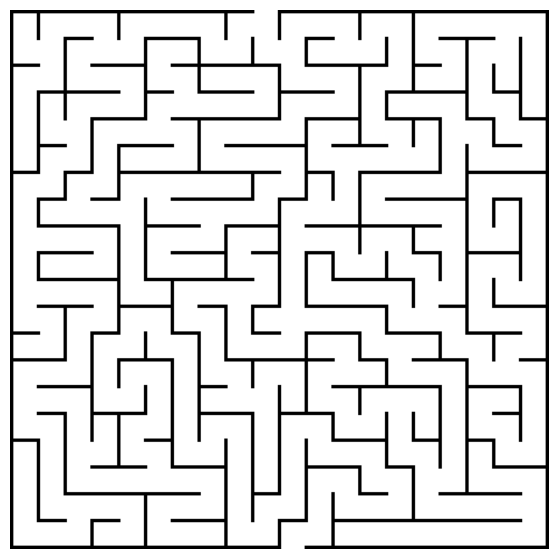

In [5]:
test_image = cv2.imread('task_1/20 by 20 orthogonal maze.png')

plot_one_image(test_image)

Теперь реализуем функцию ```plot_maze_path``` в ```task_1.py``` для того, чтобы найти координаты пути через лабиринт.

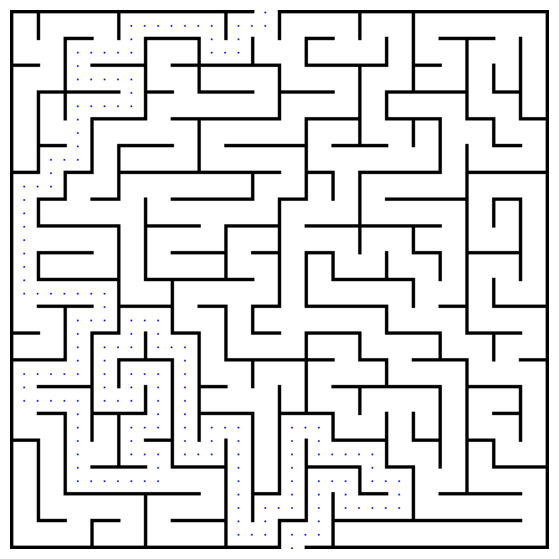

In [6]:
way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт
find_way_from_maze(test_image)
image_with_way = plot_maze_path(test_image, way_coords)

plot_one_image(image_with_way)

# Задача №2 - Пробки в городе

Напишем программу, которая на вход принимает картинку, на которой схематически изображена машинка на дороге с $N$ полосами и препятствия на полосах. Соответствующие объекты обозначены цветами, которые сохраняются на всех изображениях. 

Результатом работы программы является номер полосы, на которую нужно перестроиться или сообщение о том, что перестраиваться не нужно.

**Примечание: номер дороги считается слева направо, отсчет начинается с нуля.**

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/8z84sJG/image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/Z6m4XFz/image_01.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [7]:
from task_2 import find_road_number

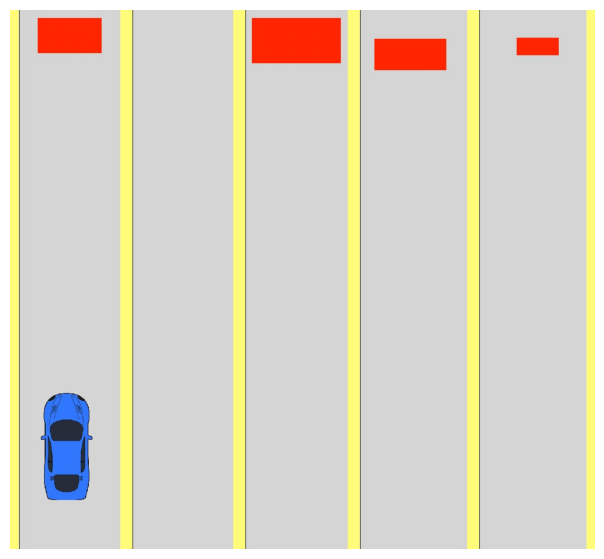

In [8]:
test_image = cv2.imread('task_2/image_00.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

In [9]:
message = find_road_number(test_image)

print(message)

Нужно перестроиться на дорогу номер 1
